# 문제1 : 온라인 소비자 분석(군집분석)

## 1. EDA를 통해 소비자 특성 등 인사이트를 도출하시오.

In [12]:
import pandas as pd
import numpy as np

raw = pd.read_csv('./OnlineRetail_RAW.csv')
after = pd.read_csv('./OnlineRetail_after.csv')

In [13]:
after

,Unnamed: 0,CustomerID,Recency,Frequency,Amount
0,0,12346,325,2,0.00
1,1,12747,22,103,4196.01
2,2,12748,4,4642,32034.17
3,3,12749,22,231,3868.20
4,4,12820,44,59,942.34
...,...,...,...,...,...
3945,3945,18280,159,10,180.60
3946,3946,18281,3,7,80.82
3947,3947,18282,92,13,176.60
3948,3948,18283,9,756,2329.67


In [14]:
raw

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [16]:
raw.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [17]:
raw.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [18]:
# raw = raw[raw['Quantity'] > 0]
# raw = raw[raw['UnitPrice'] > 0]

In [19]:
raw = raw[raw['CustomerID'].notnull()]
raw.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [20]:
raw['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [21]:
new_raw = raw[raw['Country']=='United Kingdom'].copy()
new_raw['sale_amount'] = new_raw['Quantity'] * new_raw['UnitPrice']
new_raw['CustomerID'] = new_raw['CustomerID'].astype(int)
new_raw['InvoiceDate'] = pd.to_datetime(new_raw['InvoiceDate'])
new_raw

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sale_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-09-12 12:31:00,1.95,15804,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-09-12 12:49:00,2.95,13113,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-09-12 12:49:00,1.25,13113,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-09-12 12:49:00,8.95,13113,United Kingdom,214.80


In [22]:
print(new_raw['CustomerID'].value_counts().head(5))
print(new_raw.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])


17841    7983
14096    5128
12748    4642
14606    2782
15311    2491
Name: CustomerID, dtype: int64
CustomerID
18102    256438.49
17450    187482.17
17511     88125.38
16684     65892.08
13694     62653.10
Name: sale_amount, dtype: float64


In [24]:
new_raw.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

1.0283604908240456

In [23]:
aggregation ={
    'InvoiceDate' : 'max',
    'InvoiceNo' : 'count',
    'sale_amount' : 'sum'
}

cust_df = new_raw.groupby('CustomerID').agg(aggregation)
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:17:00,2,0.00
1,12747,2011-11-17 17:13:00,103,4196.01
2,12748,2011-12-05 18:58:00,4642,29072.10
3,12749,2011-11-17 12:05:00,231,3868.20
4,12820,2011-10-26 13:27:00,59,942.34
...,...,...,...,...
3945,18280,2011-07-03 09:52:00,10,180.60
3946,18281,2011-12-06 10:53:00,7,80.82
3947,18282,2011-09-08 15:10:00,13,176.60
3948,18283,2011-11-30 12:59:00,756,2094.88


In [11]:
import datetime as dt
dt.datetime(2011,12,10) - pd.to_datetime(cust_df['Recency'])

0      325 days 13:43:00
1       22 days 06:47:00
2        4 days 05:02:00
3       22 days 11:55:00
4       44 days 10:33:00
              ...       
3945   159 days 14:08:00
3946     3 days 13:07:00
3947    92 days 08:50:00
3948     9 days 11:01:00
3949   -1 days +13:37:00
Name: Recency, Length: 3950, dtype: timedelta64[ns]

In [106]:
cust_df

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:17:00,2,0.00
1,12747,2011-11-17 17:13:00,103,4196.01
2,12748,2011-12-05 18:58:00,4642,29072.10
3,12749,2011-11-17 12:05:00,231,3868.20
4,12820,2011-10-26 13:27:00,59,942.34
...,...,...,...,...
3945,18280,2011-07-03 09:52:00,10,180.60
3946,18281,2011-12-06 10:53:00,7,80.82
3947,18282,2011-09-08 15:10:00,13,176.60
3948,18283,2011-11-30 12:59:00,756,2094.88


In [107]:
import datetime as dt

cust_df['Recency'] =  dt.datetime(2011,12,10) - pd.to_datetime(cust_df['Recency'])
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 컬럼 건수는 ',cust_df.shape)
cust_df

cust_df 로우와 컬럼 건수는  (3950, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,2,0.00
1,12747,23,103,4196.01
2,12748,5,4642,29072.10
3,12749,23,231,3868.20
4,12820,45,59,942.34
...,...,...,...,...
3945,18280,160,10,180.60
3946,18281,4,7,80.82
3947,18282,93,13,176.60
3948,18283,10,756,2094.88


In [101]:
after

,Unnamed: 0,CustomerID,Recency,Frequency,Amount
0,0,12346,325,2,0.00
1,1,12747,22,103,4196.01
2,2,12748,4,4642,32034.17
3,3,12749,22,231,3868.20
4,4,12820,44,59,942.34
...,...,...,...,...,...
3945,3945,18280,159,10,180.60
3946,3946,18281,3,7,80.82
3947,3947,18282,92,13,176.60
3948,3948,18283,9,756,2329.67


(array([3.921e+03, 1.500e+01, 1.100e+01, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ -4287.63 ,  21784.982,  47857.594,  73930.206, 100002.818,
        126075.43 , 152148.042, 178220.654, 204293.266, 230365.878,
        256438.49 ]),
 <BarContainer object of 10 artists>)

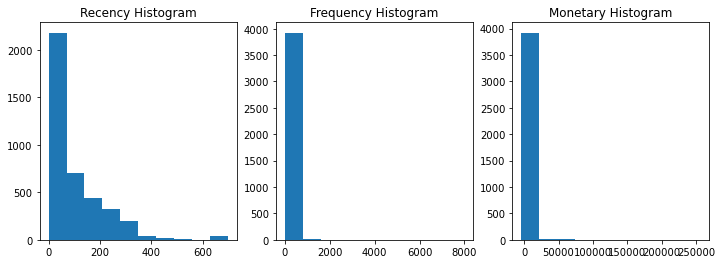

In [109]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

In [110]:
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3950.000000,3950.000000,3950.000000
mean,101.417975,91.614684,1713.385669
std,114.009397,220.557389,6548.608224
min,0.000000,1.000000,-4287.630000
25%,20.000000,17.000000,282.255000
50%,58.000000,41.000000,627.060000
75%,153.000000,101.000000,1521.782500
max,697.000000,7983.000000,256438.490000


In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.543


In [112]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [113]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

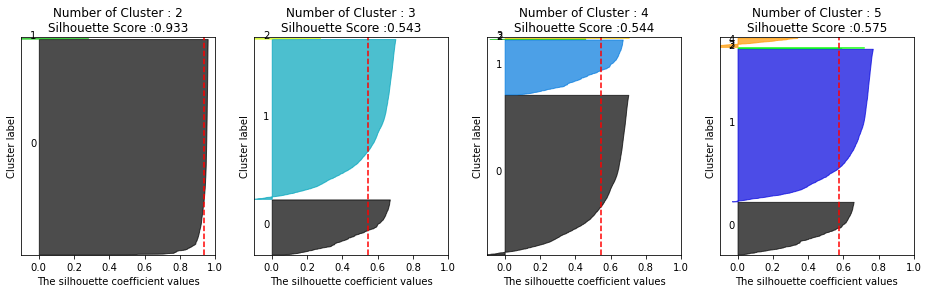

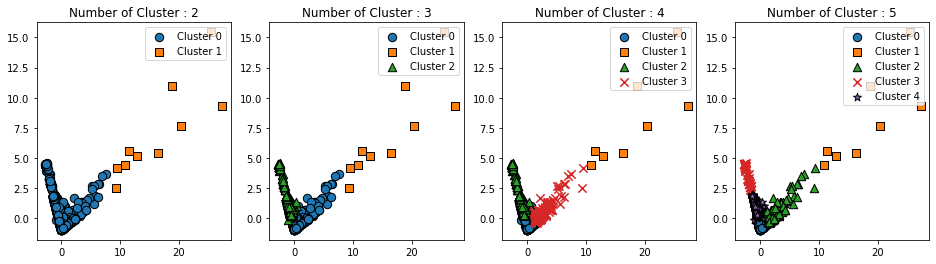

In [114]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [129]:
cust_df.loc[cust_df['Monetary'] < 0,'Monetary'] = 0

In [130]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

In [131]:
# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.285


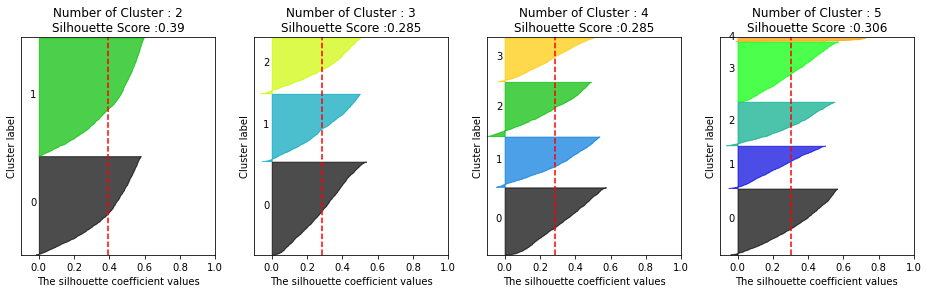

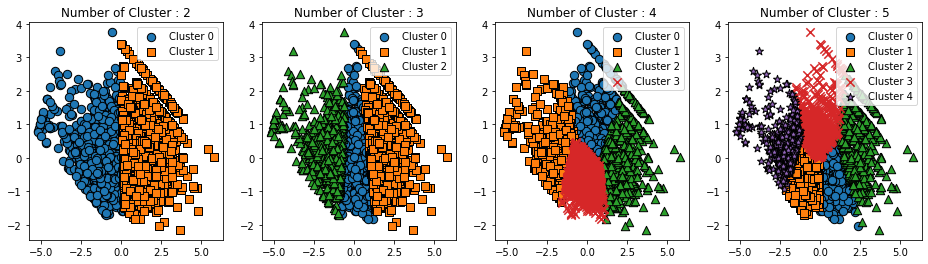

In [132]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

# 문제2 : ’금시세와 코로나19 바이러스는 관련이 있을까?‘(시계열 분석) (외생변수 : 미국 워싱턴 기준 코로나 19 확진자수, 종속변수 : 금 종가)

In [1]:
import pandas as pd
import numpy as np

gold = pd.read_csv('./gold.csv')
covid = pd.read_csv('./covid19_wc.csv')

In [17]:
display(gold.head())
covid.head()

,date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,281.0,281.0,281.0,282.7,4,USD
1,2000-01-05,283.2,283.2,283.2,281.1,16,USD
2,2000-01-06,281.4,281.4,281.4,281.4,0,USD
3,2000-01-07,281.9,281.9,281.9,281.9,0,USD
4,2000-01-10,281.7,281.7,281.7,281.7,0,USD


,Unnamed: 0,date,cases
0,0,2020-01-21,1
1,1,2020-01-22,1
2,2,2020-01-23,1
3,3,2020-01-24,1
4,4,2020-01-25,1


In [18]:
gold.info()
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      5735 non-null   object 
 1   Open      5735 non-null   float64
 2   High      5735 non-null   float64
 3   Low       5735 non-null   float64
 4   Close     5735 non-null   float64
 5   Volume    5735 non-null   int64  
 6   Currency  5735 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 313.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  844 non-null    int64 
 1   date        844 non-null    object
 2   cases       844 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 19.9+ KB


## 1. 위 두 데이터셋을 불러와서 covid19_wc 데이터셋의 날짜 기준으로 merge(inner join)하고 [’date’, ‘ cases’, ‘ Close’] 3개의 변수를 갖는 데이터셋으로 만드시오.

In [2]:
gold['date'] = pd.to_datetime(gold['date'])
covid['date'] = pd.to_datetime(covid['date'])

In [3]:
data = pd.merge(gold,covid)

In [4]:
gold[(gold['date'] >= '2020-01-21') & (gold['date'] <='2022-05-13')]

,date,Open,High,Low,Close,Volume,Currency
5112,2020-01-21,1557.3,1568.8,1546.0,1557.9,462622,USD
5113,2020-01-22,1558.9,1559.8,1550.0,1556.7,286081,USD
5114,2020-01-23,1558.9,1567.5,1551.3,1565.4,361025,USD
5115,2020-01-24,1562.9,1575.5,1555.8,1571.9,427139,USD
5116,2020-01-27,1580.5,1588.4,1575.3,1577.4,398058,USD
...,...,...,...,...,...,...,...
5718,2022-05-09,1883.7,1885.6,1851.0,1858.6,218821,USD
5719,2022-05-10,1853.9,1864.7,1834.5,1841.0,260811,USD
5720,2022-05-11,1836.6,1857.8,1830.6,1853.7,243561,USD
5721,2022-05-12,1852.3,1858.8,1820.1,1824.6,255608,USD


In [16]:
data = data[['date', 'cases', 'Close']]
data = data.set_index('date')
data

,cases,Close
date,,
2020-01-21,1,1557.9
2020-01-22,1,1556.7
2020-01-23,1,1565.4
2020-01-24,1,1571.9
2020-01-27,1,1577.4
...,...,...
2022-05-09,1522821,1858.6
2022-05-10,1522842,1841.0
2022-05-11,1527939,1853.7


In [10]:
def preprocess(df):
    """
    주가 데이터 전처리
     - 월~금까지 데이터를 남겨두고 지운다. 
     - 휴장일의 경우 전날의 데이터를 그대로 사용
     - 이렇게 하는 이유는 5일 로테이션을 맞추기 위해서 (Seasonality)
    """
    df = df.copy()
    datetime_index = pd.DatetimeIndex(pd.date_range(df.index[0], df.index[-1]))
    
    df = df.reindex(datetime_index)
    df = df.loc[~df.index.weekday.isin({5, 6})]
    
    df.fillna(method='ffill', inplace=True)
    df.index.name = 'datetime'
    return df

def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ['trend', 'seasonal', 'resid']
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == 'resid':
            ax.plot(series, marker='o', linestyle='none', color='tomato')
        else:
            ax.plot(series, color='tomato')
        
        ax.legend(legend, frameon=False)

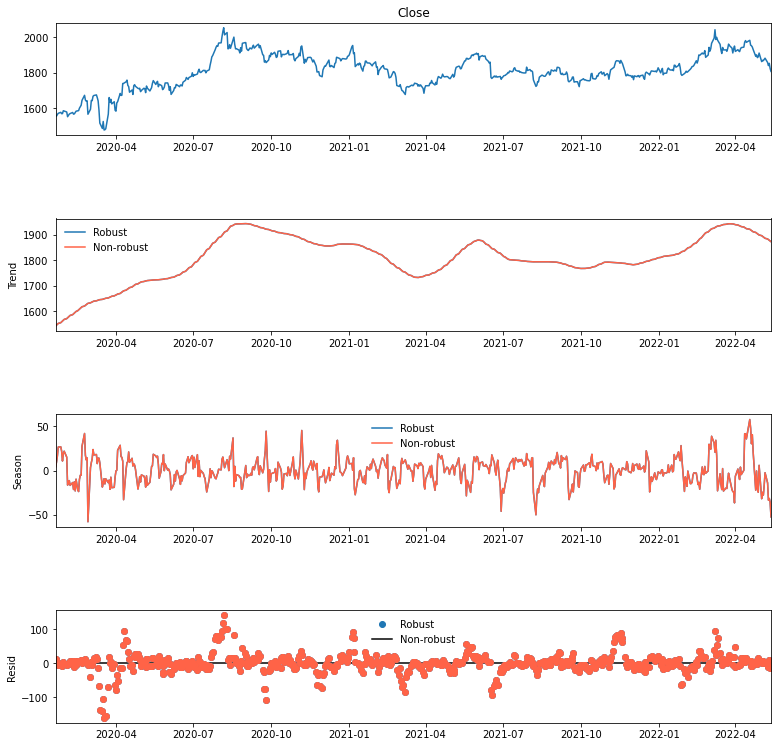

In [18]:
from statsmodels.tsa.seasonal import STL
stl = STL(data.Close, period=30, robust=True)
res = stl.fit()
fig = res.plot()
fig.set_size_inches(12, 12)

add_stl_plot(fig, res, ['Robust', 'Non-robust'])
# display(stl.config)

## 2. 코로나 확진자수에 따라 금시세가 변하는지 회귀분석을 실시하시오.

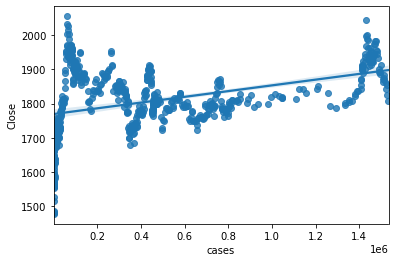

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
# 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현 
sns. regplot(x= 'cases' , y= 'Close', data= data)
plt.show()

In [64]:
import statsmodels.formula.api as smf
result = smf.ols('Close~cases', data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     104.4
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           9.85e-23
Time:                        22:37:41   Log-Likelihood:                -3636.8
No. Observations:                 611   AIC:                             7278.
Df Residuals:                     609   BIC:                             7287.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1769.3226      5.331    331.908      0.0

In [40]:
np.round(data.describe())

,cases,Close
count,611.0,611.0
mean,460657.0,1808.0
std,461504.0,101.0
min,1.0,1478.0
25%,71313.0,1756.0
50%,354906.0,1808.0
75%,693353.0,1881.0
max,1534324.0,2055.0


In [46]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
data_scaler = pd.DataFrame(stand.fit_transform(data[['cases','Close']]),columns=['cases','Close'])
data_scaler['date'] = data['date']

In [48]:
import statsmodels.formula.api as smf
result = smf.ols('Close~cases', data = data_scaler).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     104.4
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           9.85e-23
Time:                        21:34:28   Log-Likelihood:                -818.62
No. Observations:                 611   AIC:                             1641.
Df Residuals:                     609   BIC:                             1650.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.797e-15      0.037   1.01e-13      1.0

In [52]:
import  statsmodels.api as sm
# dfX = sm.add_constant(data_scaler['cases']) # 절편 / 상수항 추가 
model = sm.OLS(data_scaler['Close'], data_scaler['cases'])
results = model.fit()
print(results.params) # coef 확인
print(results.summary()) # coef, p-value, R^2

cases    0.382592
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.146
Model:                            OLS   Adj. R-squared (uncentered):              0.145
Method:                 Least Squares   F-statistic:                              104.6
Date:                Fri, 03 Jun 2022   Prob (F-statistic):                    9.09e-23
Time:                        21:46:11   Log-Likelihood:                         -818.62
No. Observations:                 611   AIC:                                      1639.
Df Residuals:                     610   BIC:                                      1644.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------

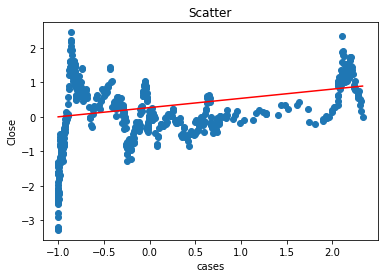

In [68]:
x_minmax = np.array([min(data_scaler['cases']),max(data_scaler['cases'])])
plt.scatter(data_scaler['cases'],data_scaler['Close'])
plt.plot(x_minmax,[0,results.params.cases * max(data_scaler['cases'])],color='red')
plt.xlabel('cases')
plt.ylabel('Close')
plt.title('Scatter')
plt.show()

<font  size="5"> 결론  </font>

<font size="4">추정된 회귀식 :  $\hat y = 0.3826*cases$</font>


<font  size="4"> 회귀 모형 검정  </font>

- 회귀 계수가 유의 한가?
-> 회귀분석 결과 상수항과 독립변수 case(확진자수)의 회귀 계수에 대한 p-value가 case(확진자수)은 유의수준 0.05 보다 작으므로 통계적으로 유의 하다고 판단 할 수 있으며, 상수항은 0.05 보다 크기 때문에 유의 하다고 볼수 없다. 상수항을 제외 하고 회귀분석을 수행한 결과 AIC,BIC가 더 낮아 진것을 확인 할 수 있다.

- 모형의 설명력은?
-> Adj. R-squared 즉 수정된 결정계수가 0.145라는 것은 해당 회귀모형이 현 데이터의 약 14%를 설명 할수 있다. 해당 회귀식이 데이터를 적절하게 설명하고 있다고는 할수 없다. 산점도 및 회귀직선을 보면 선형에서 데이터가 많이 퍼져있는것을 확인 할 수 있다.

- 모형의 통계적 유의성
-> F-statistic:104.6, Prob (F-statistic):9.09e-23가 유의 수준 0.05 보다 매우 작기 때문에 추정된 회귀 모형은 통계적으로 유의하다고 할 수 있다.

<font  size="5"> 참고  </font>
- F-통계량 값은 자유도로 조정된 설명된 변동과 설명되지 않는 변동의 비를 나타낸 것이다. 이 값은 결국 이 관계를 선형으로 볼수 있는가 없는가를 의미한다(즉, 회귀 계수가 유의한가?).

- R-squared 값은 전체 변동에 대해 모형이 설명하는 변동의 비를 나타낸다. 이 값은 자료들이 우리가 설정한 회귀 직선 주위에 얼마나 밀집되어 있는지를 의미하는 것이다. 이 값이 낮다는 것은 선형에서 많이 퍼져있는 것이다.

그래서 F값은 유의하지만, R-squared 값이 아주 낮은 경우에는 
- X가 Y에 미치는 영향은 여전히 유의하다. 
- 하지만 우리가 추정한 회귀식에서 각 값들의 분산이 커서 예측에 대해서는 신뢰하기 힘들다. 라고 결론 지을 수 있겠다.

## 3-1. 금시세를 예측하기 위해서 금시세(종가 기준) 한 개 변수를 가지고 시계열 모델을 적합하시오.

In [79]:
data = data.set_index('date')

,cases,Close
date,,
2020-01-21,1,1557.9
2020-01-22,1,1556.7
2020-01-23,1,1565.4
2020-01-24,1,1571.9
2020-01-27,1,1577.4
...,...,...
2022-05-09,1522821,1858.6
2022-05-10,1522842,1841.0
2022-05-11,1527939,1853.7


<AxesSubplot:xlabel='date'>

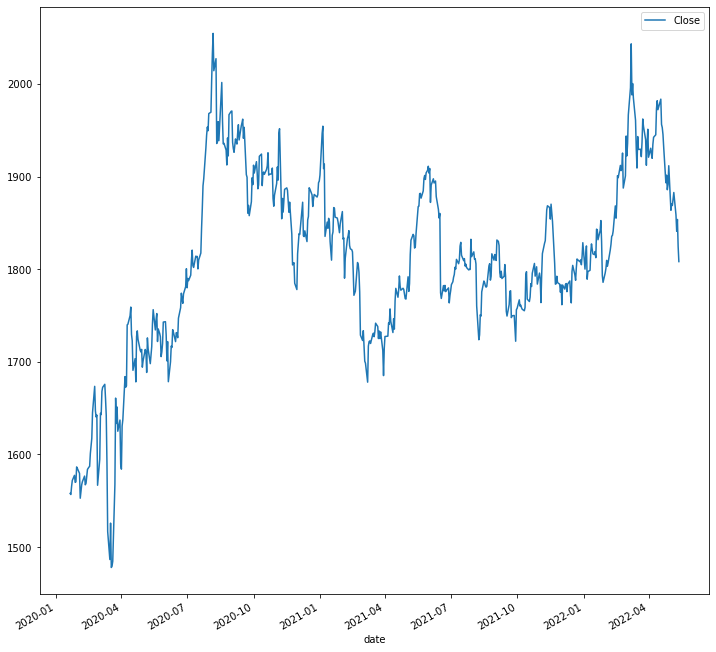

In [89]:
Close = data[['Close']]
Close.plot()

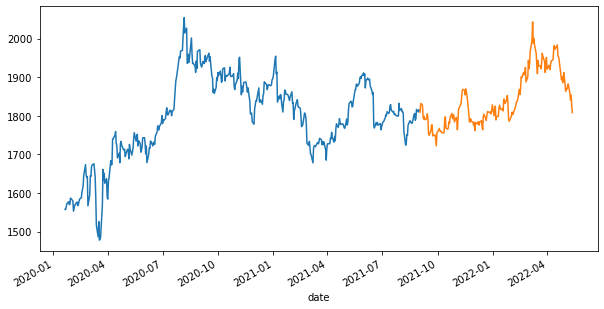

In [115]:
y_train = Close['Close'][:int(0.7*len(Close))]
y_test = Close['Close'][int(0.7*len(Close)):]
y_train.plot(figsize=(10, 5))
y_test.plot()
plt.show()

In [116]:
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    
    for key, value in critical_values.items():
        print(f'   {key} : {value}')    
    print('KPSS(추세가 있어도 계절성만 없다면 정상으로 판별함)')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""} stationary')

def print_adfuller (x):
    result = adfuller(x)
    print(f'ADF Statistic: {result[0]:.3f}')
    print(f'p-value: {result[1]:.3f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value)) 
    print('ADF (계절성이 있어도 추세만 없다면 정상으로 판별함)')
    print(f'Result: The series is {"not " if result[1] >= 0.05 else ""} stationary')
    

In [117]:
kpss_test(y_train)
print_adfuller(y_train)

KPSS Statistic: 0.7073481966642688
p-value: 0.012877436666884649
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS(추세가 있어도 계절성만 없다면 정상으로 판별함)
Result: The series is not  stationary
ADF Statistic: -2.609
p-value: 0.091
Critical Values:
	1%: -3.446
	5%: -2.868
	10%: -2.570
ADF (계절성이 있어도 추세만 없다면 정상으로 판별함)
Result: The series is not  stationary


In [118]:
diff_1 = y_train.diff(periods=1).iloc[1:] #차분1
kpss_test(diff_1)
print_adfuller(diff_1)

KPSS Statistic: 0.1692835396649909
p-value: 0.1
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS(추세가 있어도 계절성만 없다면 정상으로 판별함)
Result: The series is  stationary
ADF Statistic: -10.394
p-value: 0.000
Critical Values:
	1%: -3.446
	5%: -2.868
	10%: -2.570
ADF (계절성이 있어도 추세만 없다면 정상으로 판별함)
Result: The series is  stationary


In [170]:
import pmdarima as pm
import itertools
from statsmodels.tsa.arima.model import ARIMA

model = pm.auto_arima(y = y_train        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3815.356, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3817.263, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3817.266, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3813.697, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3819.225, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.233 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  427
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1905.849
Date:                Sat, 04 Jun 2022   AIC                           3813.697
Time:                        00:20:05   BIC                           3817.752
Sample:                             0   HQIC                          3815.299
                                - 427                                       

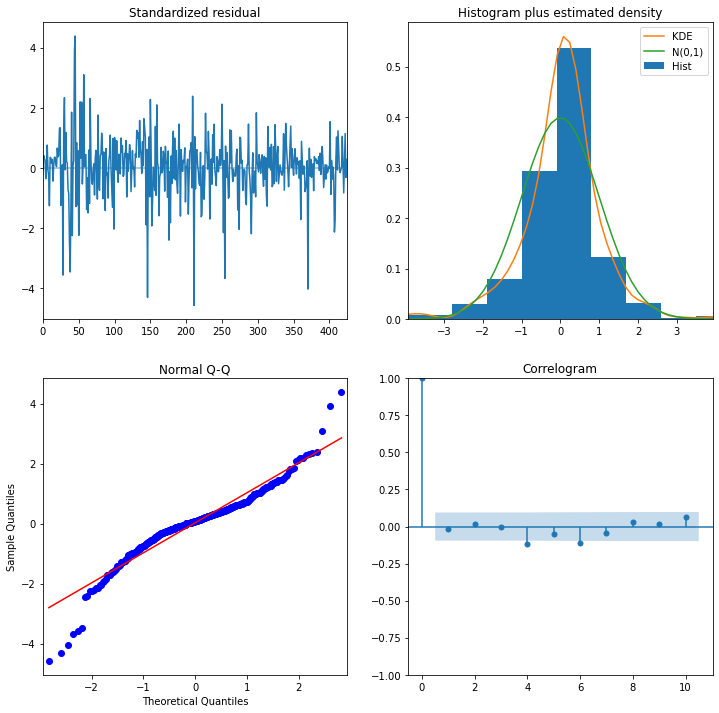

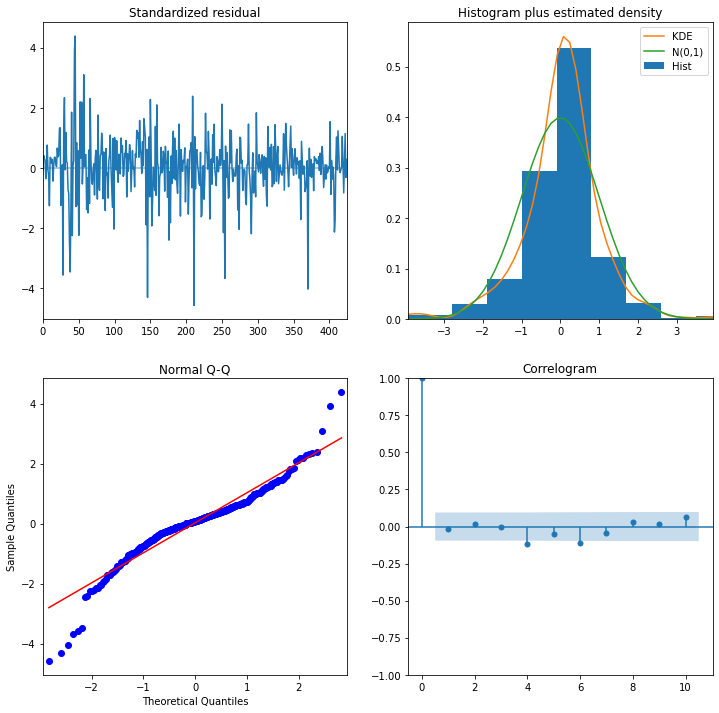

In [172]:
model.plot_diagnostics()

### 잔차 검정

- Ljung-Box (Q) 융-박스 검정 통계량는 잔차가 백색잡음인지 검정한 통계량입니다.  
-> Prob (Q) 값을 보면 0.08이므로 유의수준 0.05에서 귀무가설을 기각하지 못합니다. Ljung-Box (Q) 통계량의 귀무가설은 “잔차(residual)가 백색잡음(white noise) 시계열을 따른다”이므로, 위 결과를 통해 시계열 모형이 잘 적합되었고 남은 잔차는 더이상 자기상관을 가지지 않는 백색 잡음임을 확인할 수 있습니다.
- Jarque-Bera (JB) 자크-베라 검정 통계량은 잔차가 정규성을 띠는지 검정한 통계량입니다.  
-> Prob(JB)값을 보면 0.00으로 유의 수준 0.05에서 귀무가설을 기각합니다. Jarque-Bera (JB) 통계량의 귀무가설은 “잔차가 정규성을 만족한다”이므로, 위 결과를 통해 “잔차가 정규성을 따르지 않음”을 확인할 수 있습니다.  

- Heteroskedasticity (H) 이분산성 검정 통계량은 잔차가 이분산을 띠지 않는지 검정한 통계량입니다.
-> 위 Heteroskedasticity (H)에서 Prob (H) 부분을 보면, 0.00으로 귀무가설을 기각하지 못합니다. Heteroskedasticity (H) 통계량의 귀무가설은 “잔차가 이분산을 띠지 않는다”이므로, 위 결과를 통해 “잔차가 이분산성을 가진다”을 확인하실 수 있습니다.
 
- 또한, 잔차가 정규분포를 따른다면 경험적으로 비대칭도 (Skew)는 0에 가까워야 하고 첨도 (Kurtosis)는 3에 가까워야 합니다. 위 Summary 결과를 통해 비대칭도는 -0.57으로 0에 가깝지만 첨도는 7.11로 3보다 더 높은 값을 가지고 있음을 알 수 있습니다.


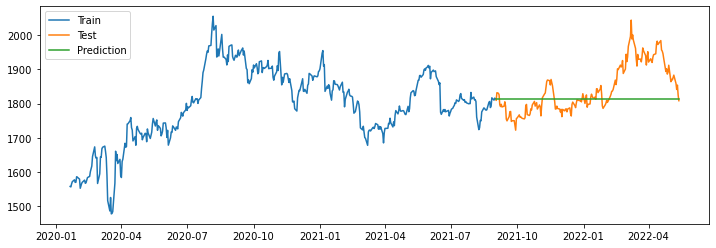

In [125]:
# 테스트 데이터 개수만큼 예측
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

model_2 = ARIMA(y_train,order=(0,1,0)).fit()
y_predict = model_2.forecast(len(y_test)) 
y_predict = pd.DataFrame(y_predict.values,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

In [166]:
history = y_train.tolist()
predictions = []
# model_res = ''
for new_ob  in y_test.values:    
    model_fit = ARIMA(history,order=(0,1,0)).fit()    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(new_ob) 
    
pred_df= pd.DataFrame({"test": y_test, "pred": predictions})
pred_df    

,test,pred
date,,
2021-09-02,1809.40,1813.80
2021-09-03,1831.50,1809.40
2021-09-05,1830.05,1831.50
2021-09-06,1825.65,1830.05
2021-09-07,1796.30,1825.65
...,...,...
2022-05-09,1858.60,1882.80
2022-05-10,1841.00,1858.60
2022-05-11,1853.70,1841.00


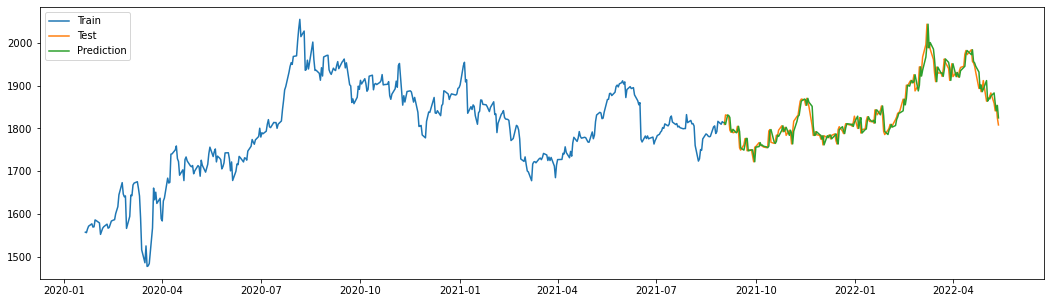

In [167]:
# 그래프
fig, axes = plt.subplots(1, 1, figsize=(18, 5))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(pred_df['pred'], label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

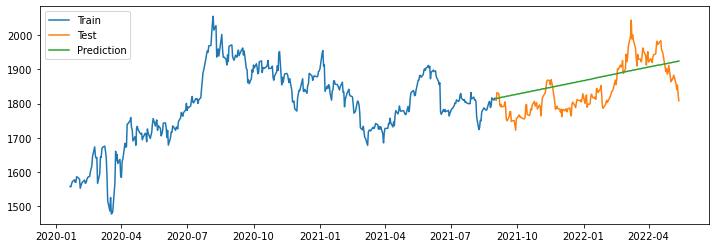

In [164]:
## exponential smoothing in Python
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fit2 = Holt(y_train).fit()
fcast2 = fit2.forecast(len(y_test)).rename("Holt's linear trend")
fcast_pred = fcast2.to_frame('Prediction').reset_index().drop('index', axis = 1).set_index(y_test.index)
# fcast2
# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(fcast_pred, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

## 3-2. 금시세를 예측하기 위해서 금시세(종가 기준)와 외생변수(코로나 확진자수)를 통해 ARIMA-X 모형을 접하시오.

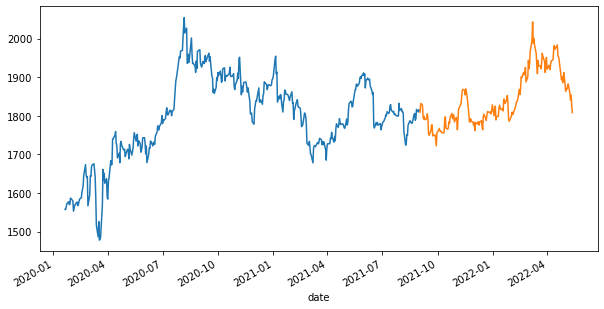

In [177]:
y_train = data[:int(0.7*len(Close))]
y_test = data[int(0.7*len(Close)):]
y_train['Close'].plot(figsize=(10, 5))
y_test['Close'].plot()
plt.show()

In [179]:
exogenous_features =['cases']

from pmdarima.arima import ndiffs
ndiffs(y_train.Close, alpha=0.05, test='adf', max_d=6)

1

In [190]:
import pmdarima as pm

model_arimax = pm.auto_arima(y_train.Close, exogenous=y_train[exogenous_features],
                             trace=True, error_action="ignore", suppress_warnings=True , seasonal=False)

model_arimax.fit(y_train.Close, exogenous=y_train[exogenous_features])

forecast = model.predict(n_periods=len(y_test), exogenous=y_test[exogenous_features])

pred_df_x= pd.DataFrame({"test": y_test['Close'], "pred": forecast})
pred_df_x    


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3825.033, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3817.300, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3819.215, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3819.239, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3815.359, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3821.323, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.634 seconds


,test,pred
date,,
2021-09-02,1809.40,1813.8
2021-09-03,1831.50,1813.8
2021-09-05,1830.05,1813.8
2021-09-06,1825.65,1813.8
2021-09-07,1796.30,1813.8
...,...,...
2022-05-09,1858.60,1813.8
2022-05-10,1841.00,1813.8
2022-05-11,1853.70,1813.8


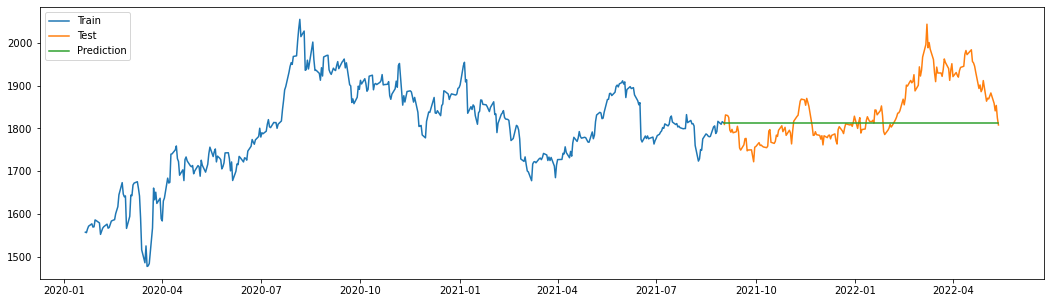

In [191]:
# 그래프
fig, axes = plt.subplots(1, 1, figsize=(18, 5))
plt.plot(y_train['Close'], label='Train')        # 훈련 데이터
plt.plot(y_test['Close'], label='Test')          # 테스트 데이터
plt.plot(pred_df_x['pred'], label='Prediction')  # 예측 데이터
plt.legend()
plt.show()